In [32]:
#loading the data
import pandas as pd
df = pd.read_csv("Advertising.csv", index_col=0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [62]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [63]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

# Analysis of the features

In [35]:
#correlation analysis

cor_matrix = df.corr()
cor_matrix 


,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


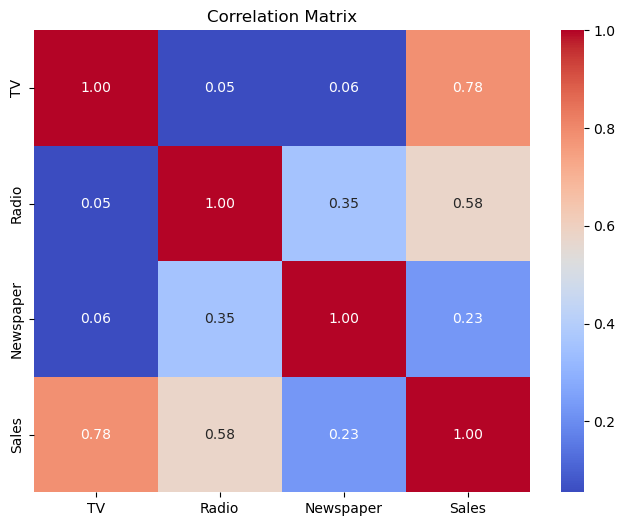

In [36]:
#visualize the correlation using heapmap


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [37]:
# Feature Selection using SelectKBest with f_regression
# Choosing the number of top features to select (k)

from sklearn.feature_selection import SelectKBest, f_regression

# Apply SelectKBest feature selection
selector = SelectKBest(score_func=f_regression, k=2)
selected_features = selector.fit_transform(ind_variables, df['Sales'])

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = ind_variables.columns[selected_feature_indices]

print("Selected Features:")
print(selected_feature_names)

Selected Features:
Index(['TV', 'Radio'], dtype='object')


# seperating the response variable from the independent variables

In [38]:
X = df.drop(columns=["Sales"])
Y = df['Sales']

In [39]:
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [40]:
Y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

# Machine learning model development

In [68]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import accuracy_score,classification_report
from sklearn.pipeline import make_pipeline
import numpy as np

In [42]:
#split into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=20, random_state=0)

# scaling the data using standardization

In [71]:
#standardizing the data

scale = StandardScaler()
X_train_scal = scale.fit_transform(X_train)
X_test_scal = scale.transform(X_test)


# Linear Regression Model

In [135]:
# building linear regression model
lg = LinearRegression()
lg.fit(X_train_scal,  Y_train)

# make prediction using the test dataset
predict_sales_Y = lg.predict(X_test_scal)

# round the predicted values
predictions = [round(x, 1) for x in predict_sales_Y]

# calculate the R-squared of the model
r_squared_lg = r2_score(Y_test, predict_sales_Y)

# calculate mean squared error (MSE) of the model
mse = mean_squared_error(Y_test, predict_sales_Y)


# cross validation using K-fold
cv_mse = cross_val_score(lg, X_train_scal, Y_train, cv=5, scoring="neg_mean_squared_error")


# Calculate the mean squared error (negative value) and convert it to positive
cv = -cv_mse.mean()

# Print coefficients
print(" \nCoefficients of the predictors variables:")
for feature, coef in zip(X.columns, lg.coef_):
    print(f"{feature}: {coef:.2f}")
print(f"Intercept: {lg.intercept_:.2f}")

print(f" \nR-Squared: {r_squared_lg:.2f}, MSE : {mse:.2f}" )
print(f"MSE CV : {cv:.2f}")

print("\nthe first 10 predicted values:")
print(predictions[:10])

 
Coefficients of the predictors variables:
TV: 3.78
Radio: 2.93
Newspaper: -0.05
Intercept: 14.15
 
R-Squared: 0.76, MSE : 7.22
MSE CV : 2.43

the first 10 predicted values:
[10.1, 7.5, 7.0, 24.1, 12.0, 6.6, 12.9, 15.1, 10.9, 16.4]


In [46]:
predict_sales_Y[0]

7.478256392818543

# Building the model without scaling the data

In [16]:
# building linear regression model
lg2 = LinearRegression()
lg2.fit(X_train,  Y_train)

# make prediction
predict = lg2.predict(X_test)

# accuracy of the model, R-square
r_squared_lg2 = r2_score(Y_test, predic)

# MSE
mse_lg2 = mean_squared_error(Y_test, predic)

#print
print("the R-Square :", r_squared_lg2)
print("MSE : ", mse_lg2)

the R-Square : 0.7556846087219633
MSE :  7.219641969961621


# Build polynomial regression model

In [120]:
features = PolynomialFeatures(degree=2, include_bias=False)

X_train_p = features.fit_transform(X_train_scal)
X_test_p = features.transform(X_test_scal)


model = LinearRegression()
model.fit(X_train_p, Y_train)

prediction_sales_Y = model.predict(X_test_p)
#round the predicted values
predictions = [round(x, 1) for x in predict_sales_Y]


#compute R-Squared to check the model performance
R_squared_p = r2_score(Y_test, prediction_sales_Y)

#MSE
MSE = mean_squared_error(Y_test, prediction_sales_Y)


# cross validation using K-fold
cv = cross_val_score(model, X_train_p, Y_train, cv = 5,  scoring='neg_mean_squared_error')

# compute the average MSE across folds
mse_cv = -cv.mean()

# Get the coefficients and feature names
print("Polynomial Regression Coefficients:")
for feature, coef in zip(features.get_feature_names_out(X.columns), model.coef_):
    print(f"{feature}: {coef:.2f}")
print(f"Intercept: {model.intercept_:.2f}")


print("\nperformance:")
print(f" R-squared: {R_squared_p:.2f}, MSE : {MSE:.2f}" )
print(f"\nCross Validation:")
print(f"MSE CV : {mse_cv:.2f}")

print("\nthe 1st 1o predicted values:")
print(predictions[:10])


Polynomial Regression Coefficients:
TV: 3.67
Radio: 2.89
Newspaper: 0.01
TV^2: -0.73
TV Radio: 1.31
TV Newspaper: -0.03
Radio^2: 0.07
Radio Newspaper: 0.00
Newspaper^2: 0.02
Intercept: 14.71

performance:
 R-squared: 0.95, MSE : 1.59

Cross Validation:
MSE CV : 0.30

the 1st 1o predicted values:
[10.1, 7.5, 7.0, 24.1, 12.0, 6.6, 12.9, 15.1, 10.9, 16.4]


# Ridge Regression

In [133]:
rid_model = Ridge()
grid_param = {'alpha': [0.1, 1.0, 10.0]}
ridg_grid = GridSearchCV(rid_model, grid_param, cv=5)
ridg_grid.fit(X_train_scal, Y_train)

#make prediction
y_pred_Sale = ridg_grid.predict(X_test_scal)

#round the values
predictions = [round(x, 1) for x in y_pred_Sale]

# Compute R-squared
r_squared_ridge = ridg_grid.score(X_test_scal, Y_test)
#compute MSE
ridge_MSE = mean_squared_error(Y_test, y_pred_Sale)


# cross validation

mse_scores = cross_val_score(ridg_grid, X_train_scal, Y_train, scoring='neg_mean_squared_error', cv=5)

# compute the average MSE across folds
mse_cv = -mse_scores.mean()



#print(mse_cv)
print(f"\nMSE: {ridge_MSE:.2f}")
print(f"\nR-square : {r_squared_ridge:.2f}")
print(f"\nCV : {mse_cv:.2f}")
print("\nthe first 10 predictions : ")
print(f" {predictions[:10]}")


MSE: 7.22

R-square : 0.76

CV : 2.43

the first 10 predictions : 
 [10.1, 7.5, 7.1, 24.1, 12.0, 6.6, 12.9, 15.1, 10.9, 16.4]


# Random Forest Regressor

In [116]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scal, Y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test_scal)

#ropund the predicted values
predictions = [round(x, 1) for x in y_pred_rf]

# Compute R-squared 
r_squared_rf = rf_model.score(X_test_scal, Y_test)

# Compute MSE
mse_rf = mean_squared_error(Y_test, y_pred_rf)

# cross validation
mse_scores = cross_val_score(rf_model, X_train_scal, Y_train, scoring='neg_mean_squared_error', cv=5)
# compute the average MSE across folds
mse_cv = -mse_scores.mean()

#print(mse_cv)
print(f"\nMSE: {ridge_MSE:.2f}")
print(f"\nR-square : {r_squared_ridge:.2f}")
print(f"\n MSE CV : {mse_cv:.2f}")
print("\nthe first 10 prediction : ")
print(f" {predictions[:10]}")




MSE: 7.22

R-square : 0.76

CV : 0.57

the first 10 prediction : 
 [10.8, 9.3, 9.3, 25.5, 12.6, 8.7, 7.1, 12.6, 8.4, 16.3]


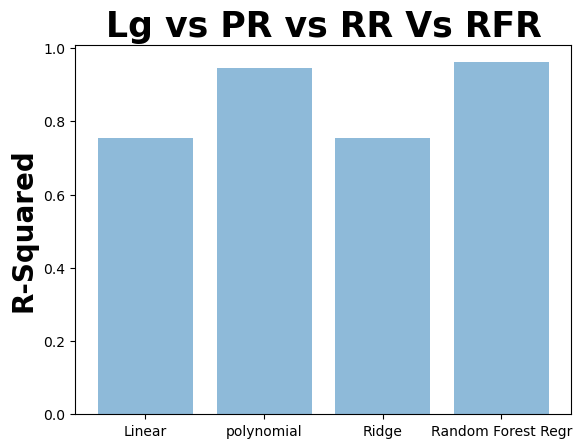

<Figure size 1500x1000 with 0 Axes>

In [132]:
import matplotlib.pyplot as plt; plt.rcdefaults()

objects = ('Linear', 'polynomial', 'Ridge', 'Random Forest Regr')
y_pos=np.arange(len(objects))
performance=[r_squared_lg, R_squared_p, r_squared_ridge, r_squared_rf]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('R-Squared', fontsize=20, fontweight='bold')
plt.title('Lg vs PR vs RR Vs RFR', fontsize=25, fontweight='bold')
plt.figure(figsize=(15, 10))
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
tv = 30, radio = 40, newspaper = 50

In [23]:
data = np.array([[30, 40, 50]])


In [136]:
pol = model.predict(features.transform(scale.transform(data)))
pol

/Users/AKB_CIM/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([9.53579691])

In [30]:
prind = lg.predict(scale.transform(data))

/Users/AKB_CIM/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [31]:
prind[0]

12.14064119815491

In [28]:
prind2 = lg2.predict(data)
prind2

/Users/AKB_CIM/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([12.1406412])

In [56]:
scaled = scale.transform([[30, 60, 50]])
predictsales = lg.predict(scaled)

/Users/AKB_CIM/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [57]:
predictsales

array([16.10481749])

In [87]:
predictsales = lg.predict(([[30, 60, 50]]))

In [88]:
predictsales

array([300.71392197])